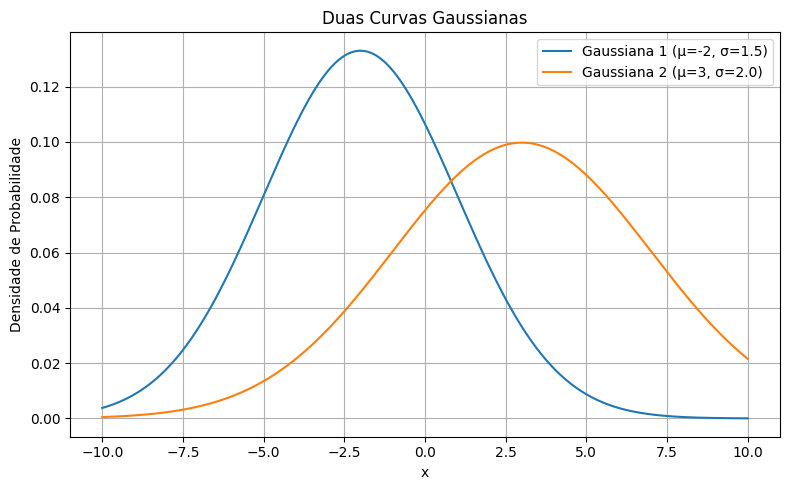

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Eixo x
x = np.linspace(-10, 10, 400)

# Parâmetros das gaussianas
mu1, sigma1 = -2, 3   # média e desvio padrão da 1ª
mu2, sigma2 = 3, 4    # média e desvio padrão da 2ª

# Densidades de probabilidade
g1 = (1 / (sigma1 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu1) / sigma1) ** 2)
g2 = (1 / (sigma2 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu2) / sigma2) ** 2)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(x, g1, label='Gaussiana 1 (μ=-2, σ=1.5)')
plt.plot(x, g2, label='Gaussiana 2 (μ=3, σ=2.0)')
plt.title('Duas Curvas Gaussianas')
plt.xlabel('x')
plt.ylabel('Densidade de Probabilidade')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('duas_gaussianas.png')   # Salva o arquivo
plt.show()

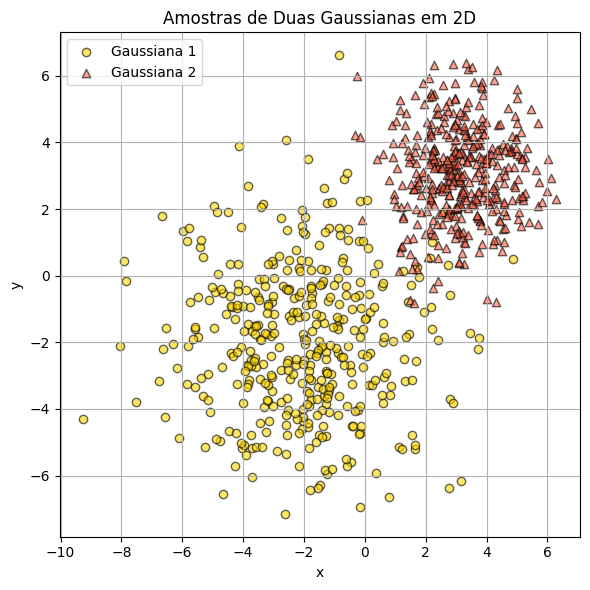

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------
# Gerar amostras de 2 Gaussianas
# ---------------------------
np.random.seed(42)                                # reprodutibilidade

mean1 = [-2, -2]                                 # média da 1ª gaussiana
cov1  = [[5, 0],                             # matriz de covariância
         [0, 5]]

mean2 = [3, 3]                                   # média da 2ª gaussiana
cov2  = [[1.7, 0],
         [0, 1.7]]

n_samples = 400
samples1 = np.random.multivariate_normal(mean1, cov1, n_samples)
samples2 = np.random.multivariate_normal(mean2, cov2, n_samples)

# ---------------------------
# Plotar pontos
# ---------------------------
plt.figure(figsize=(6, 6))
plt.scatter(samples1[:, 0], samples1[:, 1],
            color="gold", edgecolor="k", alpha=0.6, label="Gaussiana 1")
plt.scatter(samples2[:, 0], samples2[:, 1],
            color="tomato", marker="^", edgecolor="k", alpha=0.6, label="Gaussiana 2")

plt.title("Amostras de Duas Gaussianas em 2D")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Salvar (opcional)
plt.savefig("duas_gaussianas_2D.png", dpi=150)
plt.show()


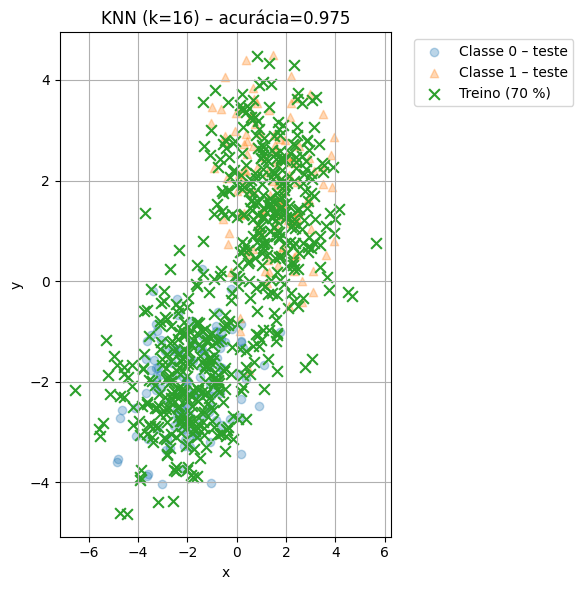

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Gerar dados
np.random.seed(42)
mean1, cov1 = [-2, -2], [[2.0, 0.3], [0.3, 1.0]]
mean2, cov2 = [1.5, 1.5],   [[1.5, -0.4], [-0.4, 1.5]]
n = 400
X = np.vstack([
    np.random.multivariate_normal(mean1, cov1, n),
    np.random.multivariate_normal(mean2, cov2, n)
])
y = np.hstack((np.zeros(n), np.ones(n)))

# 70 % treino, 30 % teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.70, stratify=y, random_state=42
)

# KNN
k = 16
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
acc = knn.score(X_test, y_test)

# Plot
plt.figure(figsize=(6, 6))
plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1],
            alpha=0.3, label="Classe 0 – teste")
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1],
            marker='^', alpha=0.3, label="Classe 1 – teste")
plt.scatter(X_train[:, 0], X_train[:, 1],
            marker='x', s=60, label="Treino (70 %)")
plt.title(f"KNN (k={k}) – acurácia={acc}")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="upper left", bbox_to_anchor=(1.05, 1))
plt.grid(True)
plt.tight_layout()
plt.savefig("gaussianas_knn_70train.png", dpi=150)
plt.show()


In [ ]:
acc

0.9958333333333333

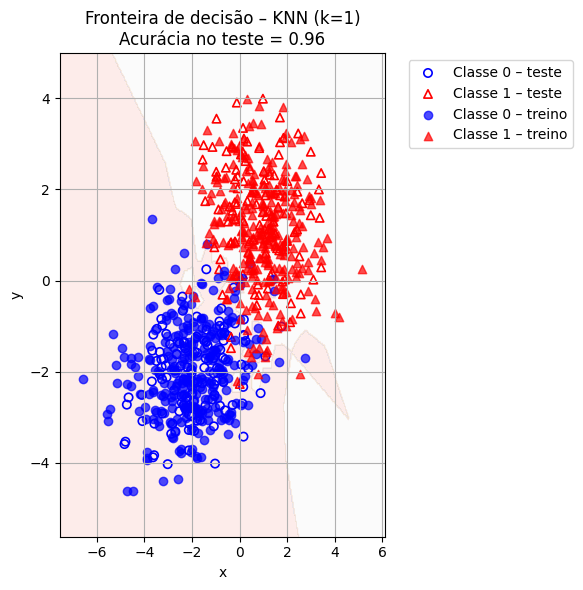

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# 1) Gerar duas gaussianas 2-D
np.random.seed(42)
mean1, cov1 = [-2, -2], [[2.0, 0.3], [0.3, 1.0]]
mean2, cov2 = [1, 1],   [[1.5, -0.4], [-0.4, 1.5]]
n = 400
X = np.vstack([
    np.random.multivariate_normal(mean1, cov1, n),
    np.random.multivariate_normal(mean2, cov2, n)
])
y = np.hstack([np.zeros(n), np.ones(n)])

# 2) Split 70 % treino / 30 % teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.70, stratify=y, random_state=42
)

# 3) Treinar K-NN
k = 1
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
acc = knn.score(X_test, y_test)

# 4) Fronteira de decisão
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(6, 6))
plt.contourf(xx, yy, Z, alpha=0.25, cmap='Pastel1')  # regiões de decisão

# ---- PONTOS DE TESTE ----
plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1],
            marker='o', facecolors='none', edgecolors='blue', linewidths=1.2,
            label='Classe 0 – teste')
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1],
            marker='^', facecolors='none', edgecolors='red', linewidths=1.2,
            label='Classe 1 – teste')

# ---- PONTOS DE TREINO ----
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1],
            marker='o', color='blue', alpha=0.7, label='Classe 0 – treino')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1],
            marker='^', color='red',  alpha=0.7, label='Classe 1 – treino')

plt.title(f'Fronteira de decisão – KNN (k={k})\nAcurácia no teste = {acc:.2f}')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.grid(True)
plt.tight_layout()
plt.savefig("gaussianas_knn_decision_shapes.png", dpi=150)
plt.show()



In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# 1) Carregar o conjunto Iris
iris = load_iris()
X, y = iris.data, iris.target            # quatro atributos + rótulos
target_names = iris.target_names         # ['setosa', 'versicolor', 'virginica']

# 2) Separar 70 % treino / 30 % teste (estratificado)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.70, stratify=y, random_state=42
)

# 3) Instanciar e treinar K-NN
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# 4) Prever no conjunto de teste
y_pred = knn.predict(X_test)

# 5) Avaliar desempenho
acc = accuracy_score(y_test, y_pred)
cm  = confusion_matrix(y_test, y_pred)

# 6) Exibir resultados
print(f"Acurácia no teste: {acc:.2f}\n")
df_cm = pd.DataFrame(cm, index=target_names, columns=target_names)
print("Matriz de confusão:")
print(df_cm)


Acurácia no teste: 0.98

Matriz de confusão:
            setosa  versicolor  virginica
setosa          15           0          0
versicolor       0          15          0
virginica        0           1         14


In [ ]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  